In [3]:
import pandas as pd

df = pd.read_csv('titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# How many passengers on board?
# How many have survived?
# How many women were in first class?

total = len(df)
print(f'Total = {total}')

survivors = len(df[df['Survived'] == 1])
print(f'Survivors = {survivors}')

rich_women = len(df[(df['Sex'] == 'female') & (df['Pclass'] == 1)])
print(f'Rich women = {rich_women}')

Total = 891
Survivors = 342
Rich women = 94


In [39]:
# Age distribution by gender and social class

mean_age_sex_pclass = df.groupby(['Sex', 'Pclass'])['Age'].mean()
print(mean_age_sex_pclass)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64


In [21]:
# Survival ratio by age group

age_groups = [0, 12, 18, 35, 60, 200]
age_groups_labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Elder']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_groups, labels=age_groups_labels, right=False)

survival_ratio = df.groupby('AgeGroup', observed=False)['Survived'].mean()
print(survival_ratio)

AgeGroup
Child          0.573529
Teen           0.488889
Adult          0.368852
Middle-aged    0.416268
Elder          0.269231
Name: Survived, dtype: float64


In [50]:
# Fare-survival relation

mean_fare = df.Fare.mean()

below_mean_fare = df[df['Fare'] < mean_fare]['Survived'].mean()
print(f'Poor = {below_mean_fare}')

above_mean_fare = df[df['Fare'] > mean_fare]['Survived'].mean()
print(f'Rich = {above_mean_fare}')

Poor = 0.3176470588235294
Rich = 0.5971563981042654


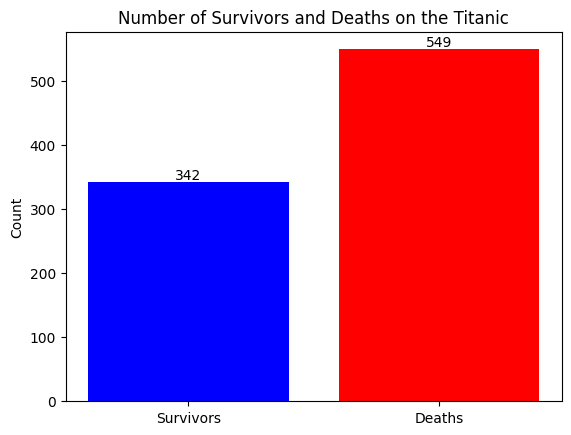

In [22]:
# Survivors and Deaths bar graph

import matplotlib.pyplot as plt

categories = ['Survivors', 'Deaths']
values = [survivors, total - survivors]

plt.bar(categories, values, color=['blue', 'red'])

plt.title('Number of Survivors and Deaths on the Titanic')
plt.ylabel('Count')

for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()



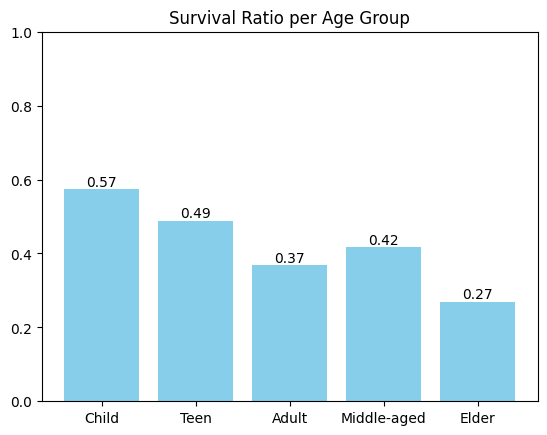

In [26]:
import matplotlib.pyplot as plt

plt.bar(survival_ratio.index, survival_ratio.values, color='skyblue')
plt.ylim([0, 1])

for i, value in enumerate(survival_ratio.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.title('Survival Ratio per Age Group')

plt.show()